<a href="https://colab.research.google.com/github/Hoopikhoop/Nick/blob/main/ITOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn.preprocessing as prepro
from sklearn.decomposition import PCA


from sklearn.ensemble import ExtraTreesClassifier

### data import

In [2]:
data =  pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/glass/glass.data",header = None)
data.head(3)

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [3]:
names =["Id","RI","Na","Mg","Al","Si","K","Ca","Ba","Fe","Class"]
data.columns=names
data = data.drop(columns=['Id'])
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1


In [4]:
data['Class'].replace(
                      {
                       1:"building_windows_float",
                       2:"building_windows_non_float",
                       3:"vehicle_windows_float",
                       4:"vehicle_windows_non_float",
                       5:"containers",
                       6:"tableware",
                       7:"headlamps",
                      },inplace=True)
data.head(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,building_windows_float
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,building_windows_float
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,building_windows_float


In [5]:
for col in data.columns:
  fr = np.random.randint(5,10)/100
  data.loc[data.sample(frac=fr).index, col]=np.nan
data.head(10)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.00,building_windows_float
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,building_windows_float
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,NaN
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,building_windows_float
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,building_windows_float
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,building_windows_float
6,1.51743,13.30,3.60,1.14,73.09,0.58,NaN,0.0,0.00,building_windows_float
7,1.51756,13.15,3.61,1.05,NaN,0.57,8.24,0.0,0.00,building_windows_float
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.0,0.00,building_windows_float
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.0,0.11,building_windows_float


### Data vizualization

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      199 non-null    float64
 1   Na      199 non-null    float64
 2   Mg      199 non-null    float64
 3   Al      203 non-null    float64
 4   Si      201 non-null    float64
 5   K       201 non-null    float64
 6   Ca      195 non-null    float64
 7   Ba      201 non-null    float64
 8   Fe      199 non-null    float64
 9   Class   197 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [7]:
data.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,199.000000,199.000000,199.000000,203.000000,201.000000,201.000000,195.000000,201.000000,199.000000
mean,1.518322,13.423920,2.654372,1.441330,72.660498,0.507214,8.950923,0.161393,0.056884
std,0.003021,0.813812,1.455611,0.507586,0.782312,0.669006,1.335208,0.479799,0.093875
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516515,12.930000,1.865000,1.190000,72.280000,0.130000,8.270000,0.000000,0.000000
50%,1.517690,13.310000,3.480000,1.360000,72.810000,0.560000,8.600000,0.000000,0.000000
75%,1.519155,13.820000,3.600000,1.625000,73.090000,0.610000,9.145000,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,14.960000,3.150000,0.370000


In [9]:
display(data['Class'].describe())
print("===================================")
display(data['Class'].value_counts())

count                            197
unique                             6
top       building_windows_non_float
freq                              73
Name: Class, dtype: object

building_windows_non_float    73
building_windows_float        64
headlamps                     26
vehicle_windows_float         14
containers                    12
tableware                      8
Name: Class, dtype: int64

In [10]:
for col in data.columns:
  missing_values_counts = data[col].isna().sum()
  percentage=100*data[col].isna().sum()/len(data[col])
  print("column",col,"contains",missing_values_counts,
        "NULL values(", percentage ,"%).")

column RI contains 15 NULL values( 7.009345794392523 %).
column Na contains 15 NULL values( 7.009345794392523 %).
column Mg contains 15 NULL values( 7.009345794392523 %).
column Al contains 11 NULL values( 5.140186915887851 %).
column Si contains 13 NULL values( 6.074766355140187 %).
column K contains 13 NULL values( 6.074766355140187 %).
column Ca contains 19 NULL values( 8.878504672897197 %).
column Ba contains 13 NULL values( 6.074766355140187 %).
column Fe contains 15 NULL values( 7.009345794392523 %).
column Class contains 17 NULL values( 7.94392523364486 %).


### Histogram

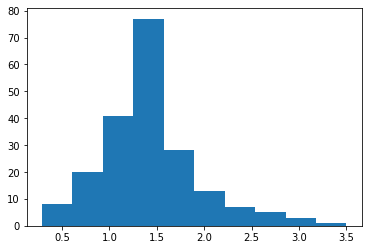

In [11]:
col='Al'
plt.hist(data[col])
plt.show()

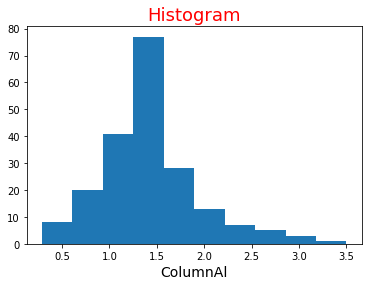

In [12]:
fig , ax = plt.subplots(figsize=(6,4))
ax.hist(data[col])
ax.set_xlabel("Column"+str(col),fontsize=14)
ax.set_title("Histogram",color='red',fontsize=18)
plt.show()

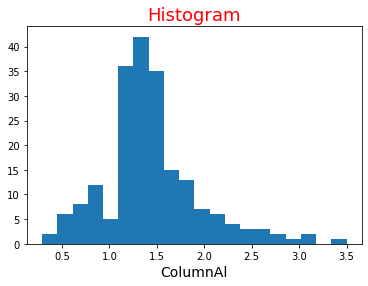

In [13]:
fig , ax = plt.subplots(figsize=(6,4))
ax.hist(data[col], bins=20)
ax.set_xlabel("Column"+str(col),fontsize=14)
ax.set_title("Histogram",color='red',fontsize=18)
plt.show()

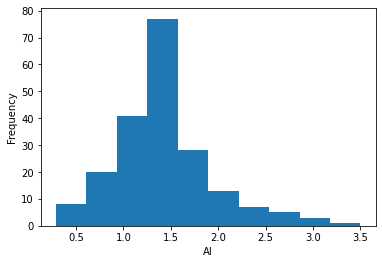

In [14]:
ax= data[col].plot(kind='hist')
ax.set_xlabel(col)
plt.show()

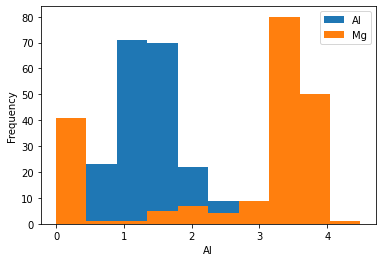

In [15]:
ax= data[['Al','Mg']].plot(kind='hist')
ax.set_xlabel(col)
plt.show()

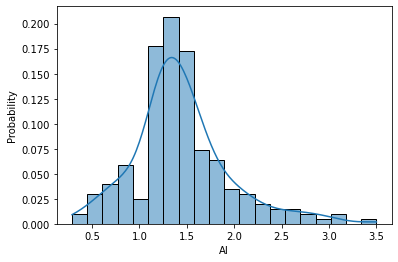

In [16]:
sns.histplot(data=data, x=col,
             bins=20,
             kde=True,
             stat='probability')
plt.show()

<function matplotlib.pyplot.show>

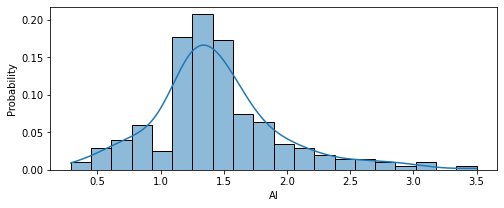

In [17]:
plt.figure(figsize=(8,3))
ax=sns.histplot(data=data, x=col,
             bins=20,
             kde=True,
             stat='probability')
plt.show

### bar plot

In [18]:
col='Class'

In [19]:
df1= data[col].value_counts()
df1

building_windows_non_float    73
building_windows_float        64
headlamps                     26
vehicle_windows_float         14
containers                    12
tableware                      8
Name: Class, dtype: int64

In [20]:
df1.index.values

array(['building_windows_non_float', 'building_windows_float',
       'headlamps', 'vehicle_windows_float', 'containers', 'tableware'],
      dtype=object)

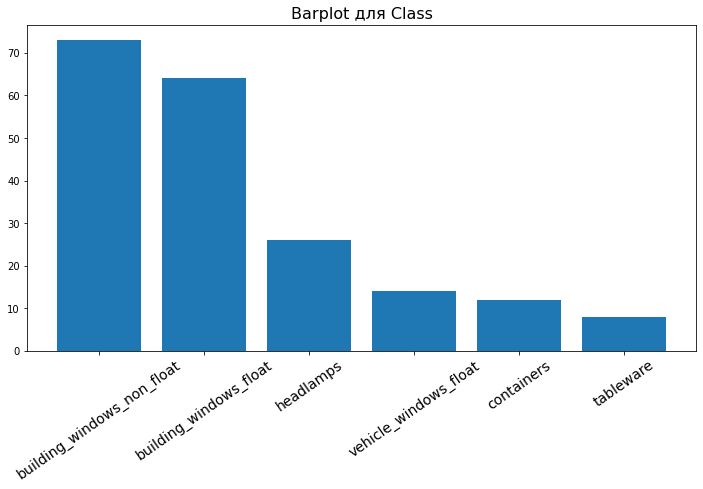

In [21]:
col='Class'

fig,ax =plt.subplots(figsize=(12,6))

ax.bar(data[col].value_counts().index.values,
       data[col].value_counts().values)
ax.set_xlabel(None,fontsize=16)
ax.set_title('Barplot для '+str(col),fontsize=16)
ax.tick_params(axis='x',which='major',
               labelsize=14,rotation=35)
plt.show()

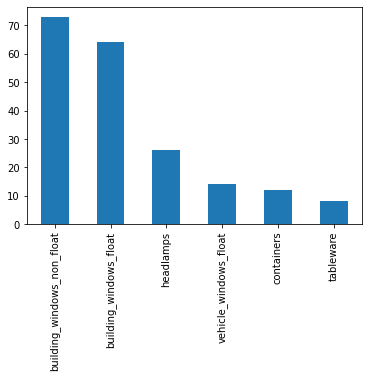

In [22]:
data[col].value_counts().plot(kind='bar')
plt.show()

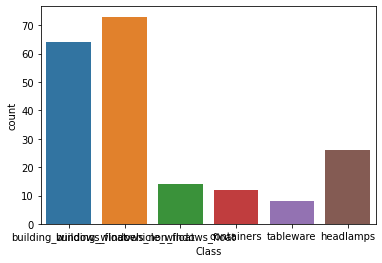

In [23]:
sns.countplot(data=data, x='Class')
plt.show()

Задание 3. Визуальный анализ данных

In [36]:
cols = data.columns
cols

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'], dtype='object')

In [37]:
import ipywidgets as widgets
def showDiagramm(col):
    fig, ax = plt.subplots(figsize=(10,10))
    if col == "Class":
      ax.bar(data[col].value_counts().index.values, data[col].value_counts().values)
      ax.set_title("Barplot для " + col, fontsize=16)
      ax.tick_params(axis="x", which="major", labelsize=10, rotation = 35)
    else:
      ax.hist(data[col], density = True, bins = 20)
      ax.set_xlabel(col, fontsize=16)
      ax.set_title("Гистограмма для " + col, fontsize=16)
    plt.show()
     
widgets.interact(showDiagramm, col=cols);

interactive(children=(Dropdown(description='col', options=('RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'…

In [38]:
def showDiagramm(col):
    fig, ax = plt.subplots(figsize=(10,10))
    data1 = data[col][~np.isnan(data[col])].copy()
    ax.boxplot(data1, showmeans=True) 
    ax.set_title(f"Ящик с усами, {col}", fontsize=16)
    plt.show()
     
widgets.interact(showDiagramm, col=cols[:-1]);

interactive(children=(Dropdown(description='col', options=('RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe'…

In [39]:
def showDiagramm(col1, col2):
    fig, ax = plt.subplots(figsize=(10,10))
    for glassType in data['Class'].value_counts().index.values:
      ax.scatter(data[col1][data['Class']==glassType], data[col2][data['Class']==glassType], label=glassType)
    ax.set_xlabel(col1, fontsize=16)
    ax.set_ylabel(col2, fontsize=16)
    plt.show()
     
widgets.interact(showDiagramm, col1=cols[:-1], col2=cols[:-1]);

interactive(children=(Dropdown(description='col1', options=('RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe…

### other plots

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show>

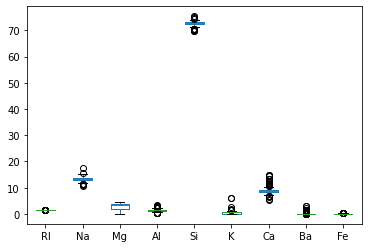

In [40]:
data.plot(kind='box')
plt.show

In [41]:
data.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'], dtype='object')

In [42]:
data.columns.values

array(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Class'],
      dtype=object)

In [43]:
data.columns.values !='Si'

array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True])

In [44]:
data.columns.values[data.columns.values !='Ca']

array(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ba', 'Fe', 'Class'],
      dtype=object)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


<function matplotlib.pyplot.show>

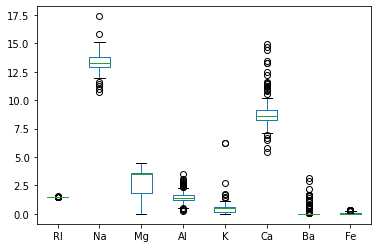

In [45]:
data[data.columns.values[data.columns.values !='Si']].plot(kind='box')
plt.show

<function matplotlib.pyplot.show>

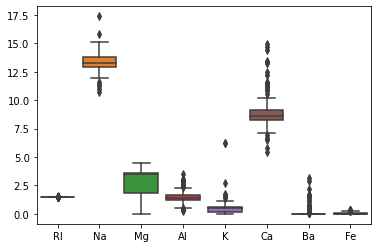

In [46]:
sns.boxplot(data=data[data.columns.values[data.columns.values !='Si']])
plt.show

### scaler

In [47]:
scaler1=prepro.MinMaxScaler()
datascaler1=scaler1.fit_transform(data[data.columns.values[data.columns.values !='Class']])

datascaler1=pd.DataFrame(datascaler1, columns=data.columns.values[data.columns.values !='Class'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


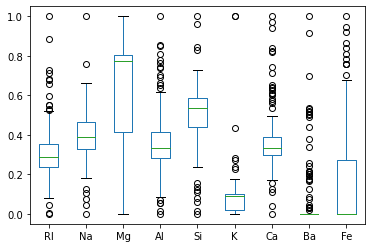

In [48]:
datascaler1.plot(kind='box')
plt.show()

<function matplotlib.pyplot.show>

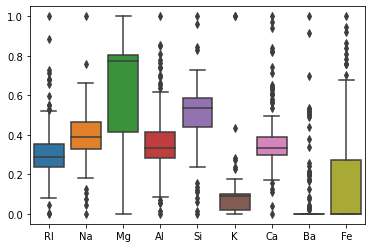

In [49]:
sns.boxplot(data=datascaler1)
plt.show

In [50]:
scaler2=prepro.StandardScaler()
datascaler2=scaler2.fit_transform(data[data.columns.values[data.columns.values !='Class']])

datascaler2=pd.DataFrame(datascaler2, columns=data.columns.values[data.columns.values !='Class'])

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


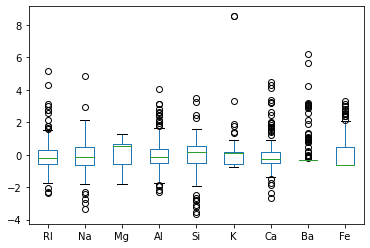

In [51]:
datascaler2.plot(kind='box')
plt.show()

### pair plot

In [52]:
col1='Mg'
col2='Fe'

<function matplotlib.pyplot.show>

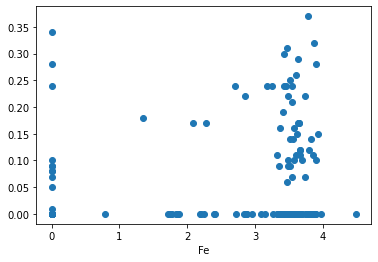

In [53]:
fig, ax =plt.subplots()
ax.scatter(data[col1], data[col2])
ax.set_xlabel(col1)
ax.set_xlabel(col2)

plt.show

In [54]:
df1=data['Class'].value_counts()
df1.index.values

array(['building_windows_non_float', 'building_windows_float',
       'headlamps', 'vehicle_windows_float', 'containers', 'tableware'],
      dtype=object)

<function matplotlib.pyplot.show>

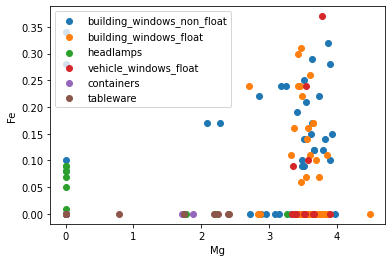

In [55]:
fig, ax = plt.subplots()

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(data[col1][data['Class']==glassType],data[col2] [data['Class']==glassType],label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()
plt.show

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<function matplotlib.pyplot.show>

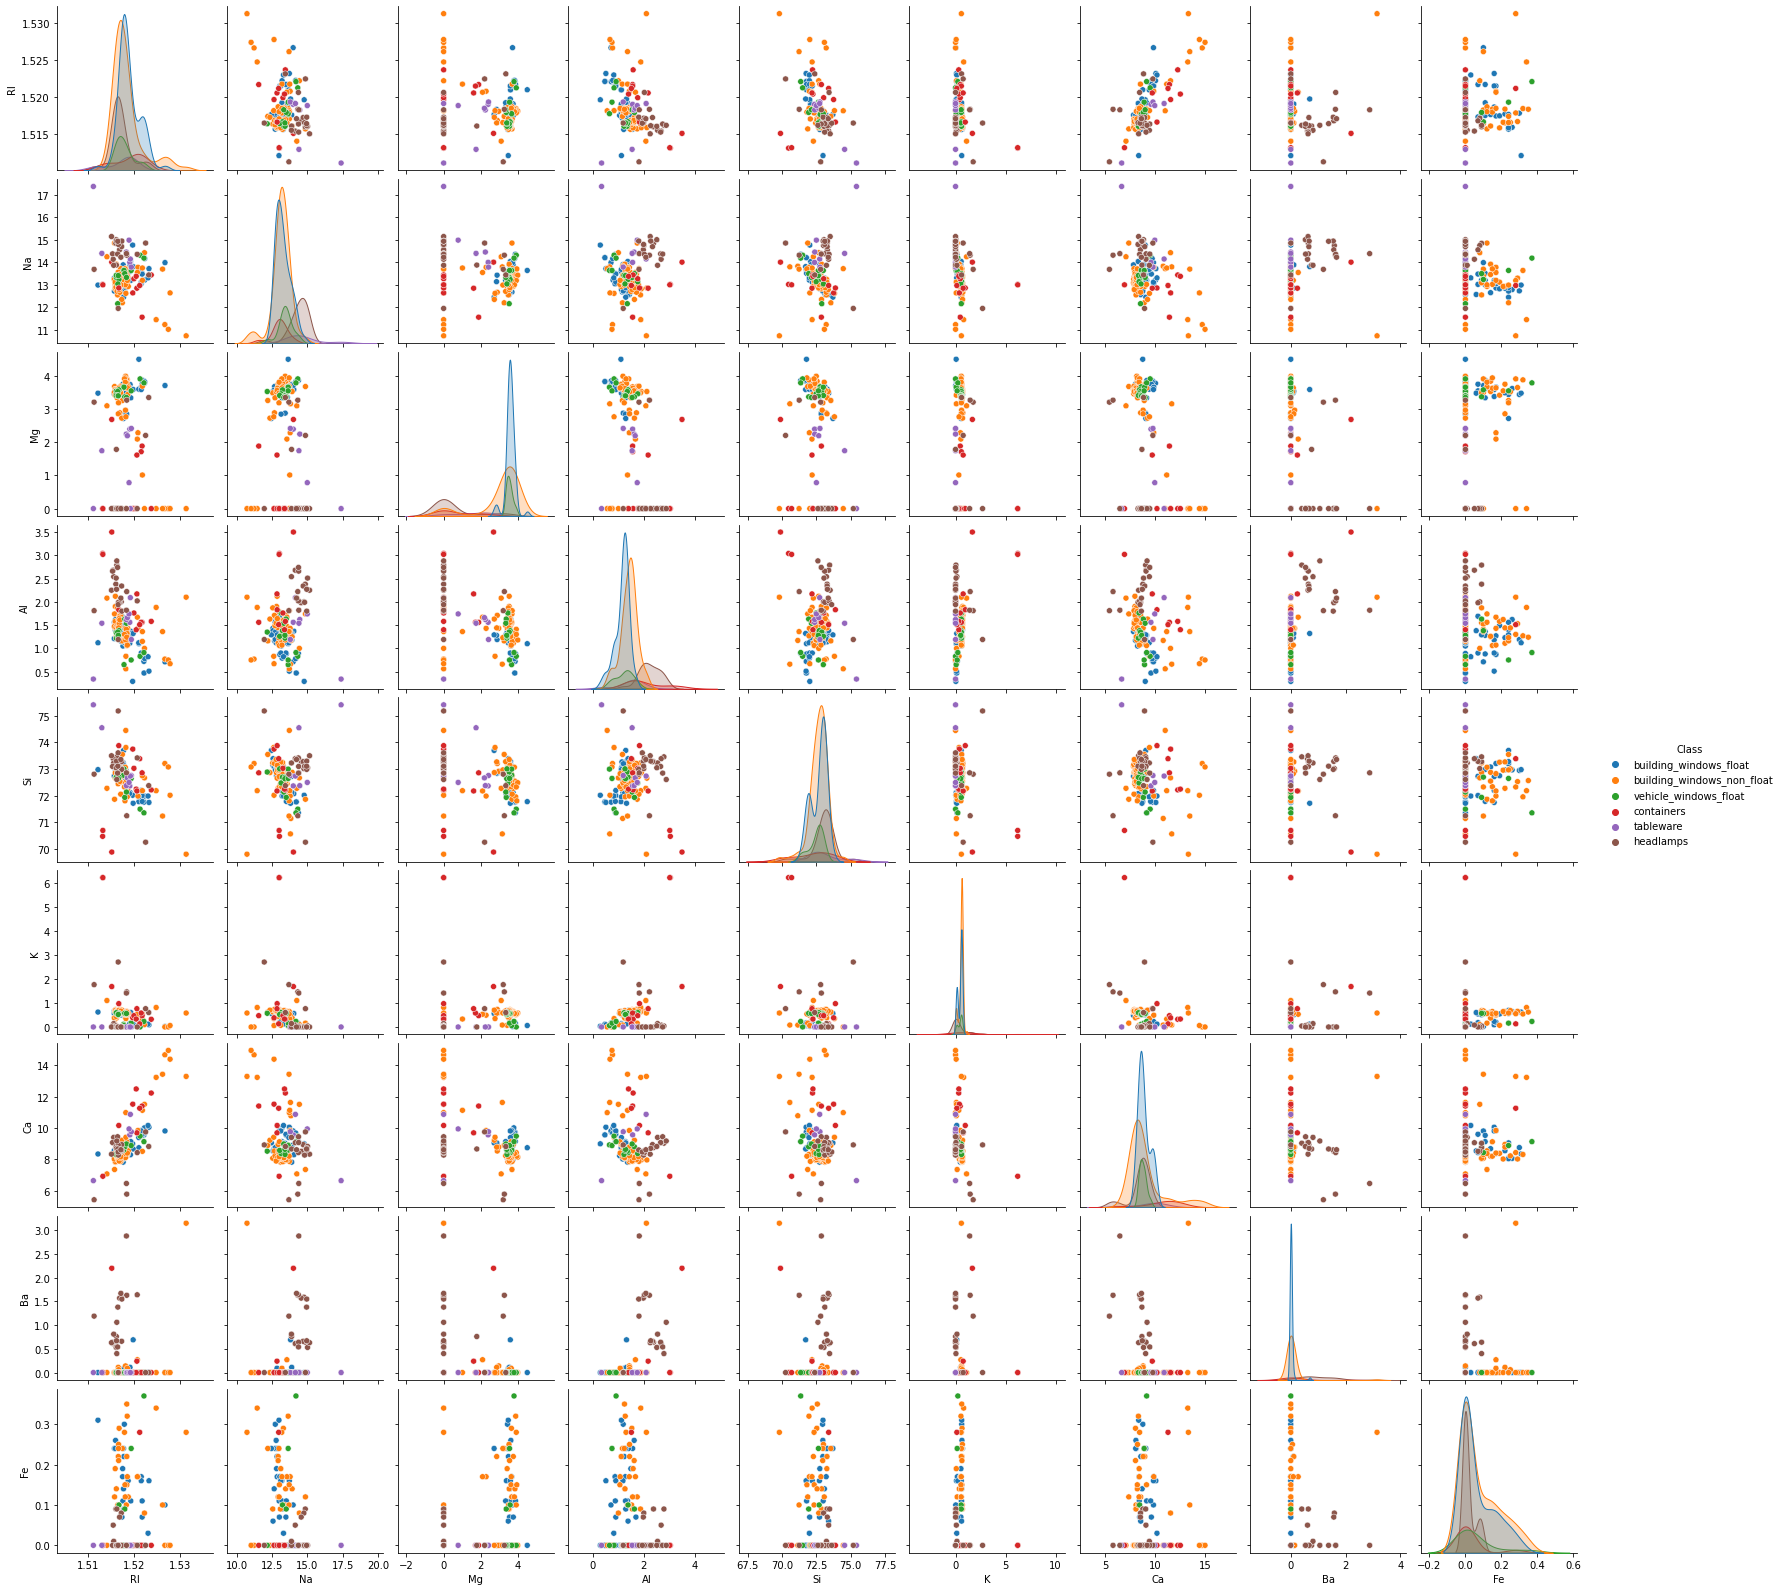

In [56]:
sns.pairplot(data=data, hue='Class')
plt.show

### Задание 4

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64000,4.49,1.10,71.78,0.060000,8.75,0.000000,0.000000,building_windows_float
1,1.51761,13.89000,3.60,1.36,72.73,0.480000,7.83,0.000000,0.000000,building_windows_float
2,1.51618,13.53000,3.55,1.54,72.99,0.390000,7.78,0.000000,0.000000,NaN
3,1.51766,13.21000,3.69,1.29,72.61,0.570000,8.22,0.000000,0.000000,building_windows_float
4,1.51742,13.27000,3.62,1.24,73.08,0.550000,8.07,0.000000,0.000000,building_windows_float
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,13.42392,0.00,2.88,72.61,0.507214,9.18,1.060000,0.000000,headlamps
210,1.51685,14.92000,0.00,1.99,73.06,0.000000,8.40,0.161393,0.000000,NaN
211,1.52065,14.36000,0.00,2.02,73.42,0.000000,8.44,1.640000,0.000000,headlamps
212,1.51651,13.42392,0.00,1.94,73.61,0.000000,8.48,0.161393,0.000000,headlamps


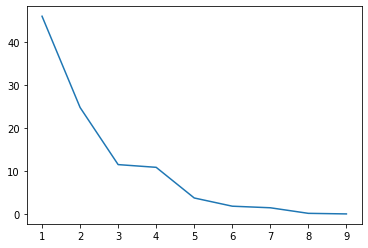

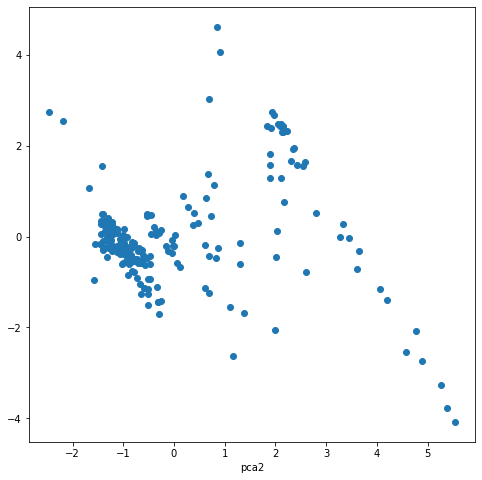

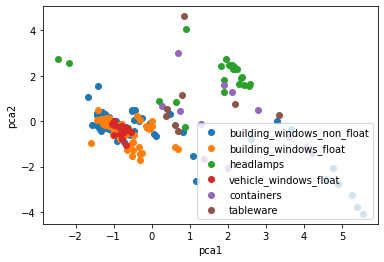

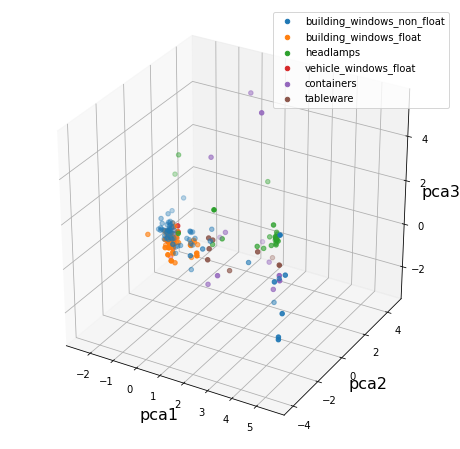

In [57]:
#@markdown Задание 4.1
#@markdown Пропуски
data.mean()
data_fillna_mean=data.fillna(data.mean()).copy()
data_fillna_mean['RI'].fillna(data['RI'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Na'].fillna(data['Na'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Mg'].fillna(data['Mg'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Al'].fillna(data['Al'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Si'].fillna(data['Si'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['K'].fillna(data['K'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Ca'].fillna(data['Ca'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Ba'].fillna(data['Ba'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Fe'].fillna(data['Fe'].value_counts().index.values[0],
                                 inplace=True)
display(data_fillna_mean)

data_fillna_mean['Na'].isna().sum()


pca=PCA()
pca.fit(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Class']])

fig, ax = plt.subplots()
ax.plot(np.arange(1,10),pca.explained_variance_ratio_*100)
plt.show
rez = pca.transform(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Class']])
dataPca= pd.DataFrame(rez)
pcaNames=[]
for i in range (9):
  pcaNames.append('pca'+str(i+1))

dataPca.columns=pcaNames
dataPca.head()
dataPca['Class']=data_fillna_mean['Class'].copy()
fig, ax =plt.subplots(figsize=(8,8))
ax.scatter(dataPca['pca1'], dataPca['pca2'])
ax.set_xlabel('pca1')
ax.set_xlabel('pca2')

plt.show

col1='pca1'
col2='pca2'

fig, ax = plt.subplots()

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(dataPca[col1][dataPca['Class']==glassType],dataPca[col2] [dataPca['Class']==glassType],label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()
plt.show()

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')


for glassType in dataPca['Class'].value_counts().index.values:
  ax.scatter(dataPca['pca1'][dataPca['Class']==glassType],
             dataPca['pca2'] [dataPca['Class']==glassType],
             dataPca['pca3'] [dataPca['Class']==glassType],
                              label=glassType)

ax.set_xlabel('pca1', fontsize=16)
ax.set_ylabel('pca2', fontsize=16)
ax.set_zlabel('pca3', fontsize=16)
ax.legend()
plt.show()

In [58]:
corr=data_fillna_mean.corr()

### NaN

In [60]:
data.mean()

RI     1.518322
Na    13.423920
Mg     2.654372
Al     1.441330
Si    72.660498
K      0.507214
Ca     8.950923
Ba     0.161393
Fe     0.056884
dtype: float64

In [61]:
data_fillna_mean = data.fillna(data.mean()).copy()
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   197 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [62]:
data_fillna_mean['Class'].value_counts().index[0]

'building_windows_non_float'

In [63]:
data['Class'].mode()

0    building_windows_non_float
dtype: object

In [64]:
data_fillna_mean['Class'].fillna(data_fillna_mean['Class'].value_counts().index[0],
                                 inplace=True)
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [65]:
display(data_fillna_mean)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64000,4.49,1.10,71.78,0.060000,8.75,0.000000,0.000000,building_windows_float
1,1.51761,13.89000,3.60,1.36,72.73,0.480000,7.83,0.000000,0.000000,building_windows_float
2,1.51618,13.53000,3.55,1.54,72.99,0.390000,7.78,0.000000,0.000000,building_windows_non_float
3,1.51766,13.21000,3.69,1.29,72.61,0.570000,8.22,0.000000,0.000000,building_windows_float
4,1.51742,13.27000,3.62,1.24,73.08,0.550000,8.07,0.000000,0.000000,building_windows_float
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,13.42392,0.00,2.88,72.61,0.507214,9.18,1.060000,0.000000,headlamps
210,1.51685,14.92000,0.00,1.99,73.06,0.000000,8.40,0.161393,0.000000,building_windows_non_float
211,1.52065,14.36000,0.00,2.02,73.42,0.000000,8.44,1.640000,0.000000,headlamps
212,1.51651,13.42392,0.00,1.94,73.61,0.000000,8.48,0.161393,0.000000,headlamps


In [66]:
#@markdown -----
#@markdown Задание 4/1
#@markdown пропуски и Графики МГК(Заполнить по категориям средними значениями)
data.mean()
data_fillna_mean=data.fillna(data.mean()).copy()
data_fillna_mean['RI'].fillna(data['RI'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Na'].fillna(data['Na'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Mg'].fillna(data['Mg'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Al'].fillna(data['Al'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Si'].fillna(data['Si'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['K'].fillna(data['K'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Ca'].fillna(data['Ca'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Ba'].fillna(data['Ba'].value_counts().index.values[0],
                                 inplace=True)
data_fillna_mean['Fe'].fillna(data['Fe'].value_counts().index.values[0],
                                 inplace=True)
display(data_fillna_mean)

data_fillna_mean['Na'].isna().sum()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Class
0,1.52101,13.64000,4.49,1.10,71.78,0.060000,8.75,0.000000,0.000000,building_windows_float
1,1.51761,13.89000,3.60,1.36,72.73,0.480000,7.83,0.000000,0.000000,building_windows_float
2,1.51618,13.53000,3.55,1.54,72.99,0.390000,7.78,0.000000,0.000000,NaN
3,1.51766,13.21000,3.69,1.29,72.61,0.570000,8.22,0.000000,0.000000,building_windows_float
4,1.51742,13.27000,3.62,1.24,73.08,0.550000,8.07,0.000000,0.000000,building_windows_float
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,13.42392,0.00,2.88,72.61,0.507214,9.18,1.060000,0.000000,headlamps
210,1.51685,14.92000,0.00,1.99,73.06,0.000000,8.40,0.161393,0.000000,NaN
211,1.52065,14.36000,0.00,2.02,73.42,0.000000,8.44,1.640000,0.000000,headlamps
212,1.51651,13.42392,0.00,1.94,73.61,0.000000,8.48,0.161393,0.000000,headlamps


0

### PCA

In [67]:
pca=PCA()
pca.fit(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Class']])

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [68]:
pca.explained_variance_ratio_*100

array([4.59284840e+01, 2.47291949e+01, 1.14582079e+01, 1.08237303e+01,
       3.70404657e+00, 1.79481767e+00, 1.42809251e+00, 1.33388350e-01,
       3.77843960e-05])

<function matplotlib.pyplot.show>

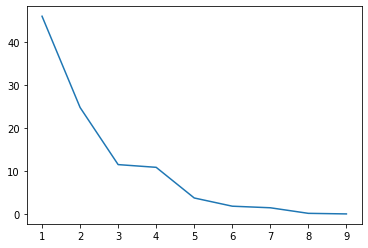

In [69]:
fig, ax = plt.subplots()
ax.plot(np.arange(1,10),pca.explained_variance_ratio_*100)
plt.show

In [70]:
rez = pca.transform(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Class']])

In [71]:
dataPca= pd.DataFrame(rez)
dataPca.head(3)

,0,1,2,3,4,5,6,7,8
0,-1.583308,-0.953481,0.194054,-1.039456,0.160653,-0.091799,0.063639,-0.072520,0.001219
1,-1.415745,0.491053,-0.158385,-0.331352,-0.156760,-0.050133,0.001705,-0.044097,0.001037
2,-1.403289,0.490029,-0.312128,0.063090,0.064504,-0.162982,0.041490,-0.051010,0.000021


In [72]:
pcaNames=[]
for i in range (9):
  pcaNames.append('pca'+str(i+1))

dataPca.columns=pcaNames
dataPca.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9
0,-1.583308,-0.953481,0.194054,-1.039456,0.160653,-0.091799,0.063639,-0.072520,0.001219
1,-1.415745,0.491053,-0.158385,-0.331352,-0.156760,-0.050133,0.001705,-0.044097,0.001037
2,-1.403289,0.490029,-0.312128,0.063090,0.064504,-0.162982,0.041490,-0.051010,0.000021
3,-1.293164,-0.126382,0.031060,0.082226,0.016621,0.034684,0.096963,-0.066040,-0.000168
4,-1.326125,0.111555,-0.341382,0.275429,-0.061645,0.095194,-0.008912,-0.058208,0.000544


In [73]:
dataPca['Class']=data_fillna_mean['Class'].copy()

<function matplotlib.pyplot.show>

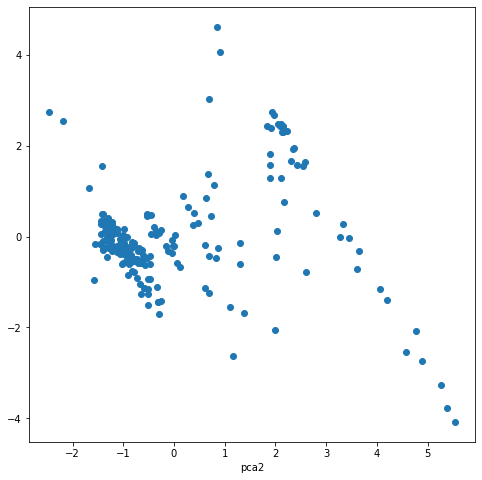

In [74]:
fig, ax =plt.subplots(figsize=(8,8))
ax.scatter(dataPca['pca1'], dataPca['pca2'])
ax.set_xlabel('pca1')
ax.set_xlabel('pca2')

plt.show

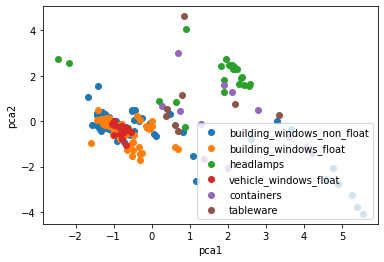

In [75]:
col1='pca1'
col2='pca2'

fig, ax = plt.subplots()

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(dataPca[col1][dataPca['Class']==glassType],dataPca[col2] [dataPca['Class']==glassType],label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()
plt.show()

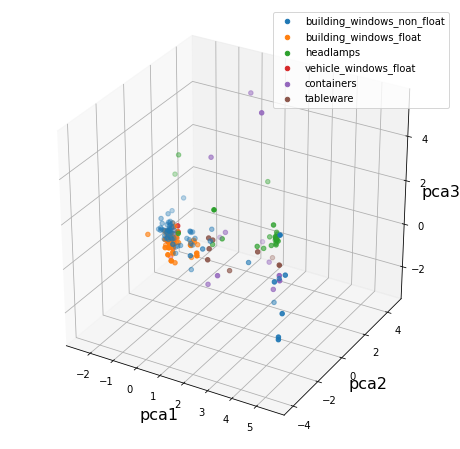

In [76]:
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')


for glassType in dataPca['Class'].value_counts().index.values:
  ax.scatter(dataPca['pca1'][dataPca['Class']==glassType],
             dataPca['pca2'] [dataPca['Class']==glassType],
             dataPca['pca3'] [dataPca['Class']==glassType],
                              label=glassType)

ax.set_xlabel('pca1', fontsize=16)
ax.set_ylabel('pca2', fontsize=16)
ax.set_zlabel('pca3', fontsize=16)
ax.legend()
plt.show()

Заполнить средними и построить графики с новым заполнением

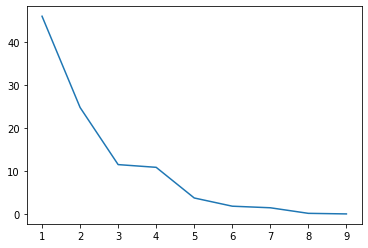

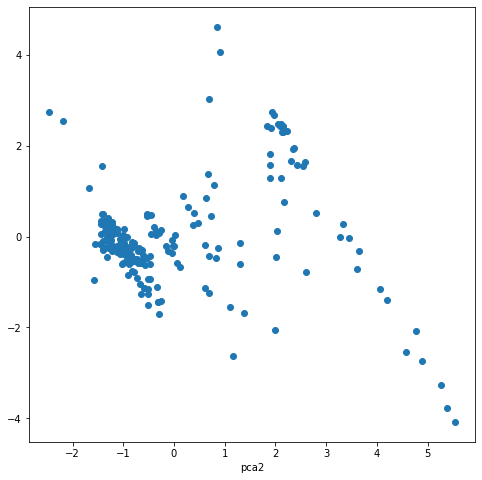

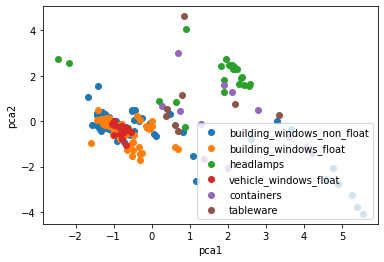

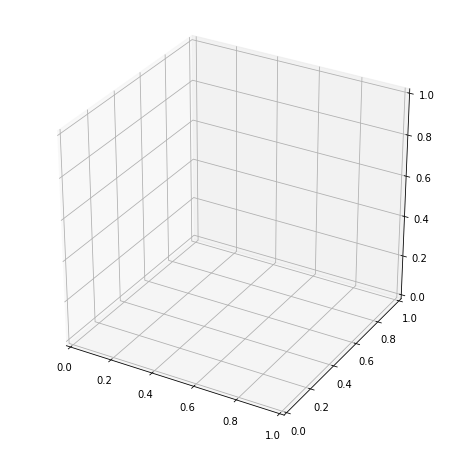

In [77]:
pca=PCA()
pca.fit(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Class']])

fig, ax = plt.subplots()
ax.plot(np.arange(1,10),pca.explained_variance_ratio_*100)
plt.show
rez = pca.transform(data_fillna_mean[data_fillna_mean.columns.values[data_fillna_mean.columns.values !='Class']])
dataPca= pd.DataFrame(rez)
pcaNames=[]
for i in range (9):
  pcaNames.append('pca'+str(i+1))

dataPca.columns=pcaNames
dataPca.head()
dataPca['Class']=data_fillna_mean['Class'].copy()
fig, ax =plt.subplots(figsize=(8,8))
ax.scatter(dataPca['pca1'], dataPca['pca2'])
ax.set_xlabel('pca1')
ax.set_xlabel('pca2')

plt.show

col1='pca1'
col2='pca2'

fig, ax = plt.subplots()

for glassType in data['Class'].value_counts().index.values:
  ax.scatter(dataPca[col1][dataPca['Class']==glassType],dataPca[col2] [dataPca['Class']==glassType],label=glassType)

ax.set_xlabel(col1)
ax.set_ylabel(col2)
ax.legend()
plt.show()

fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

### Корреляции

In [78]:
corr=data_fillna_mean.corr()
corr

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,-0.219720,-0.138129,-0.386936,-0.467789,-0.261719,0.677578,0.035649,0.139446
Na,-0.219720,1.000000,-0.247829,0.111777,-0.044831,-0.245884,-0.255955,0.259419,-0.212358
Mg,-0.138129,-0.247829,1.000000,-0.435062,-0.132153,-0.007936,-0.420256,-0.433546,0.101805
Al,-0.386936,0.111777,-0.435062,1.000000,-0.016298,0.332547,-0.217545,0.450817,-0.079038
Si,-0.467789,-0.044831,-0.132153,-0.016298,1.000000,-0.226123,-0.188483,-0.153332,-0.093340
K,-0.261719,-0.245884,-0.007936,0.332547,-0.226123,1.000000,-0.242820,-0.005542,-0.017996
Ca,0.677578,-0.255955,-0.420256,-0.217545,-0.188483,-0.242820,1.000000,-0.052815,0.069678
Ba,0.035649,0.259419,-0.433546,0.450817,-0.153332,-0.005542,-0.052815,1.000000,0.009922
Fe,0.139446,-0.212358,0.101805,-0.079038,-0.093340,-0.017996,0.069678,0.009922,1.000000


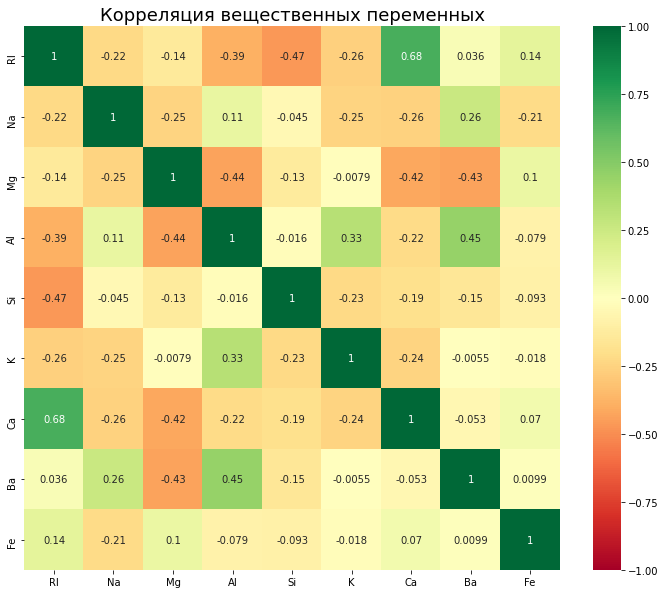

In [79]:
plt.figure(figsize=(12,10))

ax=sns.heatmap(corr, annot=True, vmax=1, vmin=-1, cmap='RdYlGn')
ax.set_title('Корреляция вещественных переменных',fontsize=18)

plt.show()

In [80]:
corr[corr>0.54]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
RI,1.000000,NaN,NaN,NaN,NaN,NaN,0.677578,NaN,NaN
Na,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mg,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
Al,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
Si,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
K,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
Ca,0.677578,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
Ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
Fe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


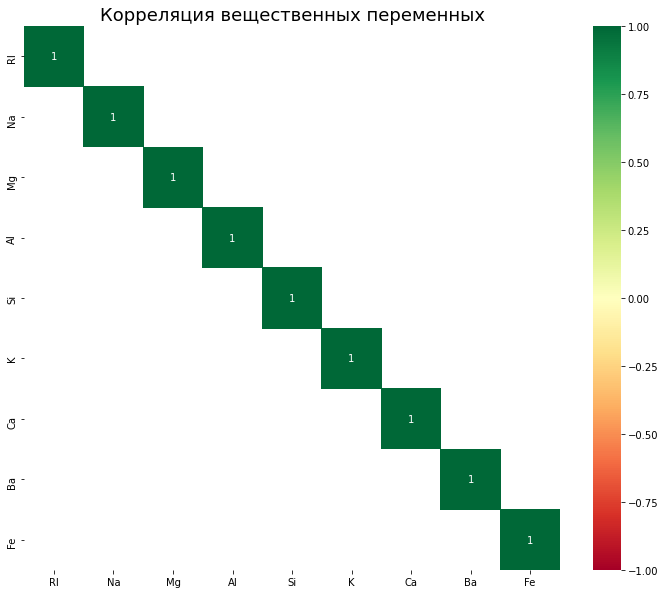

In [81]:
plt.figure(figsize=(12,10))

ax=sns.heatmap(corr[(corr>=0.75)|(corr<=-0.75)],
               annot=True, vmax=1, vmin=-1, cmap='RdYlGn')
ax.set_title('Корреляция вещественных переменных',fontsize=18)

plt.show()

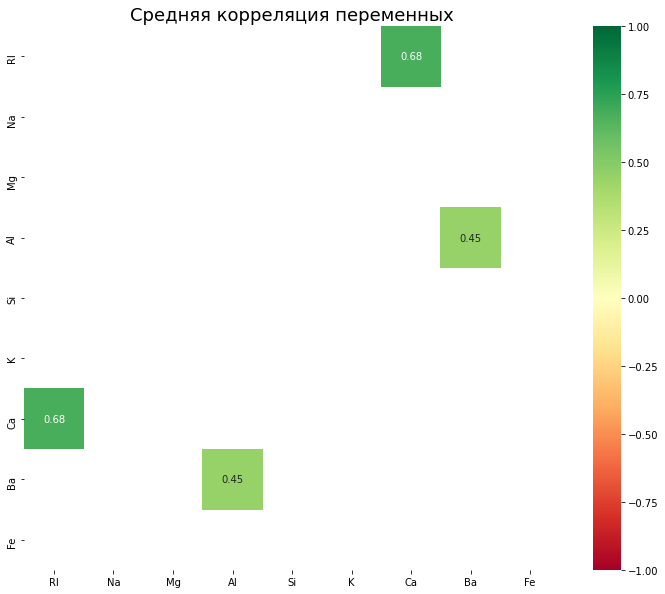

In [82]:
data.mean()
data_fillna_mean = data.fillna(data.mean()).copy()
plt.figure(figsize=(12,10))
ax = sns.heatmap(corr[((corr>=-0.45) & (corr<=-0.75)) | ((corr>=0.45) & (corr<=0.75))], annot=True, vmax=1, vmin=-1, cmap='RdYlGn')
ax.set_title('Средняя корреляция переменных', fontsize=18)
plt.show()

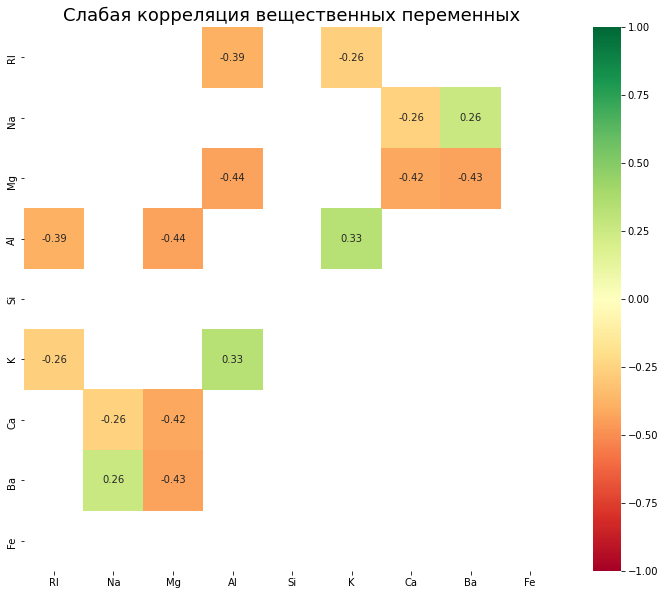

In [95]:
plt.figure(figsize=(12,10))

ax=sns.heatmap(corr[((corr>=-0.45)&(corr<=-0.25)) |((corr>=0.25)&(corr<=0.45))], annot=True, vmax=1, vmin=-1, cmap='RdYlGn')
ax.set_title('Слабая корреляция вещественных переменных',fontsize=18)

plt.show()

### feature importance

In [83]:
data_fillna_mean['Class'].fillna(data_fillna_mean['Class'].mode()[0], inplace=True)

In [84]:
data_fillna_mean['Class'].mode()[0]

'building_windows_non_float'

In [85]:
data_fillna_mean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Class   214 non-null    object 
dtypes: float64(9), object(1)
memory usage: 16.8+ KB


In [86]:
forest = ExtraTreesClassifier(n_estimators=100)

In [87]:
forest.fit(
    data_fillna_mean[ data_fillna_mean.columns.values[data_fillna_mean.columns.values!='Class'] ], 
    data_fillna_mean['Class']
    )

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [88]:
data_fillna_mean['Class'].isna().sum()

0

In [89]:
importances= forest.feature_importances_
importances

array([0.1268868 , 0.09083689, 0.14731617, 0.15397824, 0.10199266,
       0.1197615 , 0.12055348, 0.07588801, 0.06278625])

In [90]:
np.sort(importances)[::-1]

array([0.15397824, 0.14731617, 0.1268868 , 0.12055348, 0.1197615 ,
       0.10199266, 0.09083689, 0.07588801, 0.06278625])

In [91]:
indices=np.argsort(importances)[::-1]
indices

array([3, 2, 0, 6, 5, 4, 1, 7, 8])

In [92]:
print("Featire ranking")
for f in range (9):
  print("%d. feature %s (%f)" % ( f+1, data_fillna_mean.columns.values[indices[f]],
                importances[indices[f]]))

Featire ranking
1. feature Al (0.153978)
2. feature Mg (0.147316)
3. feature RI (0.126887)
4. feature Ca (0.120553)
5. feature K (0.119761)
6. feature Si (0.101993)
7. feature Na (0.090837)
8. feature Ba (0.075888)
9. feature Fe (0.062786)


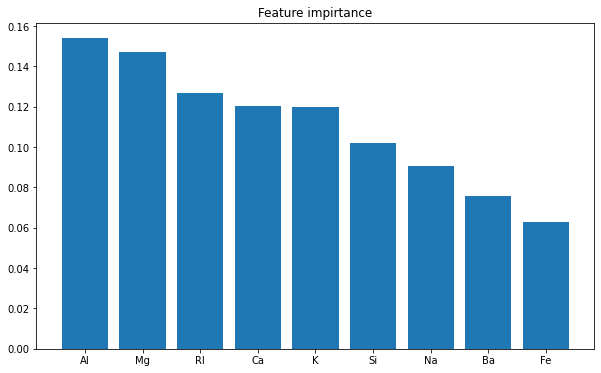

In [93]:
fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("Feature impirtance")
ax.bar(data_fillna_mean.columns.values[indices],
       importances[indices])
plt.show()

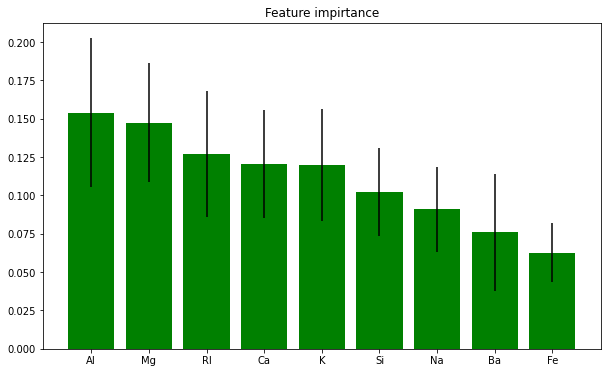

In [94]:
std=np.std([tree.feature_importances_ for tree in forest.estimators_],
           axis=0)


fig, ax = plt.subplots(figsize=(10,6))

ax.set_title("Feature impirtance")
ax.bar(data_fillna_mean.columns.values[indices],
       importances[indices],
       color='g', yerr=std[indices],align="center")
plt.show()